In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Neural Network Type Classification| TMNIST

# Abstract
The TMNIST Alphabet dataset is comprised of images showcasing handwritten characters from a variety of scripts, including but not limited to Latin, Greek, Cyrillic, and Arabic. This dataset houses a total of 93,849 images, segmented into 55,368 images for training and 38,481 images for testing purposes. Each of the images within this collection is a 28x28 pixel grayscale image, each tagged with one of 94 character labels. This dataset is frequently utilized for a range of applications, such as image classification, optical character recognition (OCR), and handwriting analysis.

# Objective
The goal is to develop a machine learning algorithm capable of identifying handwritten characters within the TMNIST Alphabet dataset, which consists of 94 different characters. Post-training, this model will be employed to predict the characters of new, previously unseen handwritten images.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder#importing the libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [72]:
#Importing Dataset
dataset = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(dataset)

The Typography MNIST (TMNIST) dataset is an extensive compilation of both handwritten and printed characters, divided into 94 unique classes. This dataset was created by amalgamating public datasets such as Chars74K, NIST Special Database 19, and the Alphabets typeface dataset. It boasts around 281,000 images, with each class represented by 3,000 images of printed and handwritten characters. Every image within this dataset is a 28x28 pixel grayscale image.

The primary aim of the TMNIST dataset is to test the effectiveness of machine learning algorithms in distinguishing between printed and handwritten characters under realistic conditions. The dataset presents a significant challenge for classification tasks due to its diverse range of character styles, typefaces, and sizes.

The TMNIST dataset is available in three distinct versions:

TMNIST Alphabet (94 characters): This version features 94 classes of both handwritten and printed characters, encompassing the entire English alphabet, numbers, and symbols.

TMNIST-Glyphs (MNIST Style Glyph Images): Contains nearly 500,000 images of 1,812 glyphs across 2,990 font styles. Each image in this version is a 28x28 pixel grayscale image of a glyph.

TMNIST (Typeface MNIST): This version is a collection of typeface-based numeral images, with each of the ten categories corresponding to the digits 0 through 9 and containing over 7,000 images each. Like the others, each image is a 28x28 pixel grayscale image.

Overall, the TMNIST dataset serves as a valuable resource for researchers and practitioners in the field of character recognition and classification, especially for those developing applications that require the processing of real-world data featuring a wide array of fonts, styles, and sizes.

# Explorartory Analysis

In [73]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
data.isnull().sum()

names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64

In [75]:
data.columns[data.isnull().any()]

Index([], dtype='object')

Dataset has no null values

In [76]:
data.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [77]:
data.shape

(274093, 786)

In [78]:
print("Number of Samples in the Dataset")
data.shape[0]

Number of Samples in the Dataset


274093

In [79]:
print("Number of Features in the Dataset")
data.shape[1]

Number of Features in the Dataset


786

In [80]:
print("Number of unique character present in the Dataset")
num_unique_chars = len(data.labels.unique())
print(num_unique_chars)

Number of unique character present in the Dataset
94


In [81]:
#All Unique Chars
all_unique_chars = list(data.labels.unique())
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


In [82]:
print("Number of Unique type of fonts are ")
num_font=data['names'].nunique()
print(num_font)

Number of Unique type of fonts are 
2990


In [83]:
y = data["labels"]

In [84]:
print(y) #Labels are defined seperately

0         6
1         D
2         f
3         /
4         F
         ..
274088    6
274089    <
274090    z
274091    ~
274092    I
Name: labels, Length: 274093, dtype: object


In [85]:
#Dropping redundant and unncessary data
df=data.drop(['names','labels'],axis=1)

In [86]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


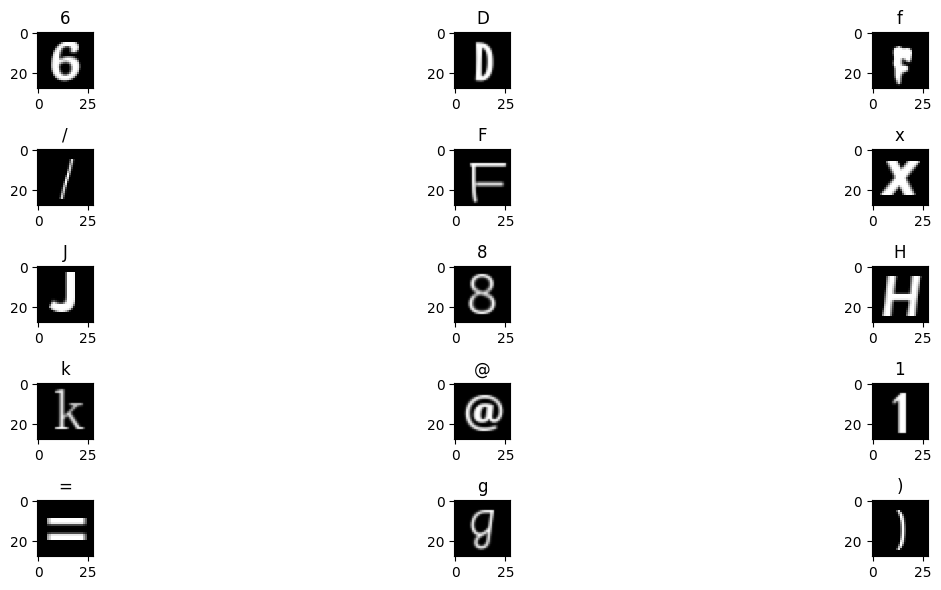

In [22]:
#Let's displays 15 images in a 5x3 grid, with each image labeled by its corresponding value in y.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 6))
for ax, img, label in zip(axes.flatten(), df.values, y):
    ax.set_title(label)
    ax.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.tight_layout()
plt.show()


The script generates a visual grid consisting of 5 rows and 3 columns of subplots. Each subplot showcases an image from the dataset, depicted as a 28x28 matrix of grayscale pixels. Above each subplot, the image's label is shown, serving as its title. To enhance the visual presentation and ensure adequate spacing between the subplots, the function plt.tight_layout() is utilized.

Through examination of the dataset, it becomes evident that it encompasses a diverse collection of alphanumeric symbols. This includes upper and lower case letters from the English alphabet, numerical digits, and unique symbols such as '@' and '='.

# Splitting the dataset into test and train

In [88]:
X_train, X_test, y_train, y_test = train_test_split( df, y, test_size=0.25, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205569, 784)
(68524, 784)
(205569,)
(68524,)


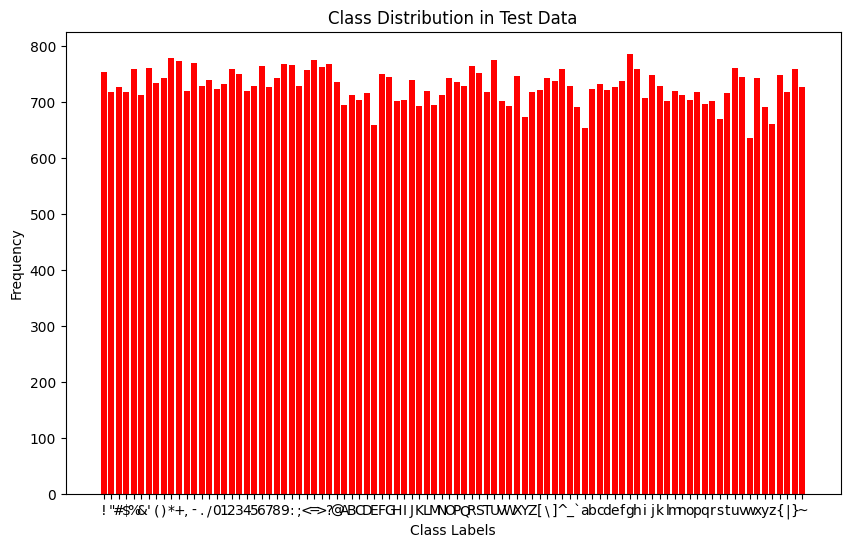

In [90]:
#visualize the class distribution of a test dataset using a bar chart
import numpy as np

unique, counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='red')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(unique)  
plt.title('Class Distribution in Test Data')
plt.show()

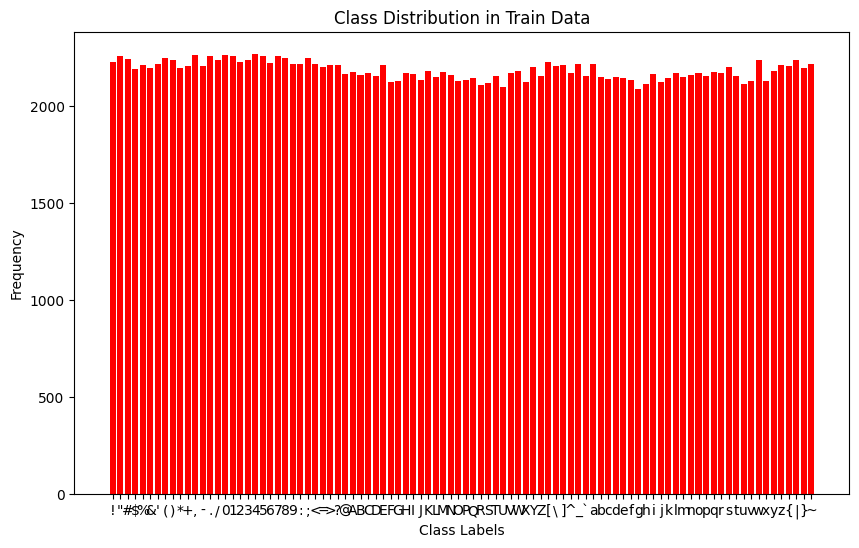

In [91]:
#visualize the class distribution of a train dataset using a bar chart
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='red')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(unique)  
plt.title('Class Distribution in Train Data')
plt.show()

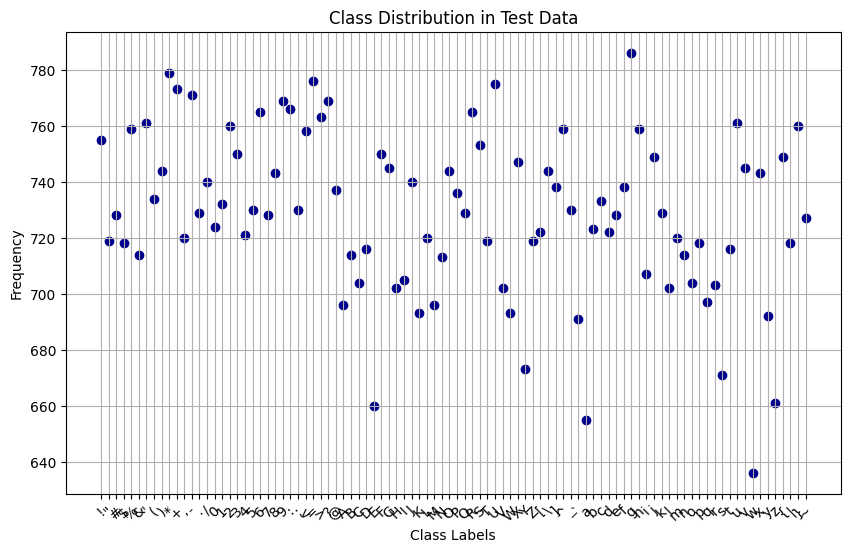

In [92]:
#visualize the class distribution of a test dataset using a scatter plot
import numpy as np
import matplotlib.pyplot as plt


unique, counts = np.unique(y_test, return_counts=True)


plt.figure(figsize=(10, 6))
label_mapping = {label: idx for idx, label in enumerate(unique)}

numeric_labels = [label_mapping[label] for label in y_test]

plt.scatter(unique, counts, color='darkblue')
plt.xticks(ticks=np.arange(len(unique)), labels=unique, rotation=45)  
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution in Test Data')
plt.grid(True) 
plt.show()

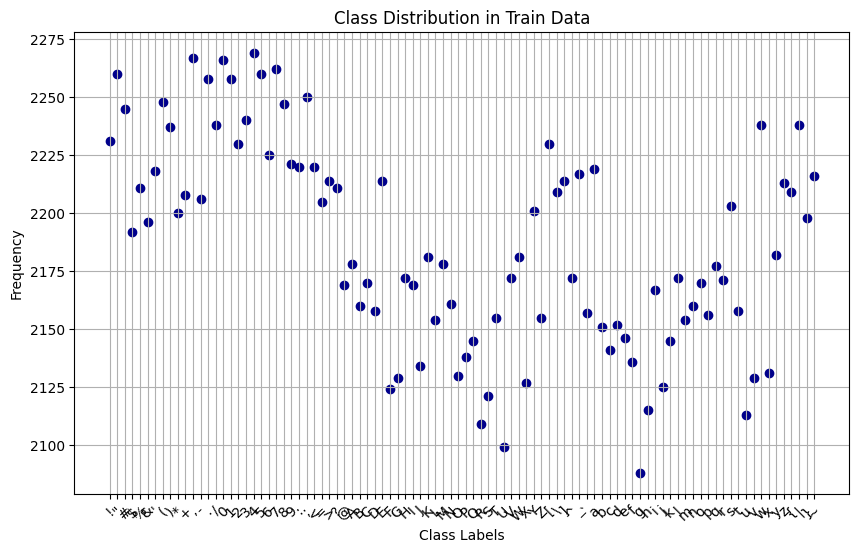

In [93]:
#visualize the class distribution of a train dataset using a scatter plot
import numpy as np
import matplotlib.pyplot as plt


unique, counts = np.unique(y_train, return_counts=True)


plt.figure(figsize=(10, 6))
label_mapping = {label: idx for idx, label in enumerate(unique)}

numeric_labels = [label_mapping[label] for label in y_test]

plt.scatter(unique, counts, color='darkblue')
plt.xticks(ticks=np.arange(len(unique)), labels=unique, rotation=45)  
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution in Train Data')
plt.grid(True) 
plt.show()

**Spliting the data into train and test sets using stratified sampling**

Using stratified sampling to divide the dataset into training and test sets ensures that both sets mirror the overall class distribution found in the full dataset. This approach enhances the accuracy of a machine learning model by training it on a sample that accurately represents the entire dataset. Consequently, the model can better generalize to new, unseen data. If the class distributions in the training and test sets are not aligned, there's a risk the model might learn to predict well only on the training data, leading to subpar performance on the test data due to overfitting.

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(df, y):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205569, 784)
(68524, 784)
(205569,)
(68524,)


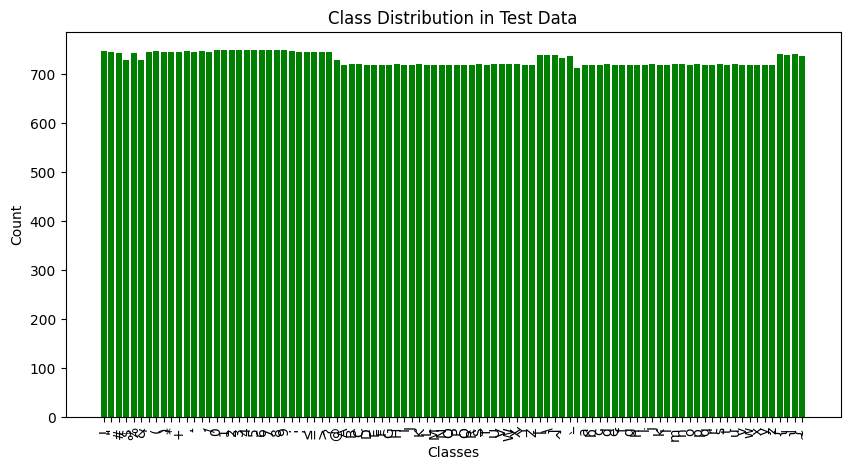

In [96]:
# visualize the class distribution of a test dataset using a bar chart
unique, counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='g')
plt.title('Class Distribution in Test Data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

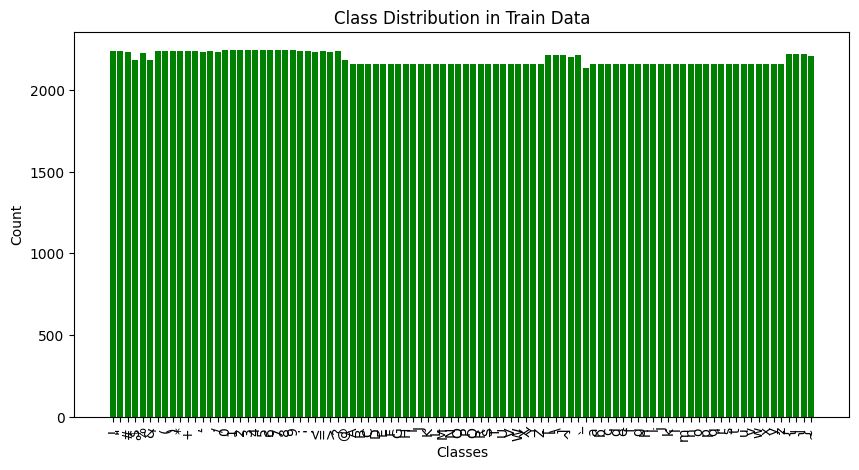

In [97]:
# visualize the class distribution of a train dataset using a vertical bar chart
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='g')
plt.title('Class Distribution in Train Data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The split is fairly similar in distribution

In [98]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

One-hot encoding is a method for transforming categorical data into binary vectors, where each category is denoted by a vector filled with zeros and a single one to represent the presence of a specific category. This approach allows categorical data to be fed into machine learning algorithms as input. Through the use of the fit_transform and transform functions of the OneHotEncoder class, the target variable is converted into a binary matrix, where each row corresponds to a binary vector representing a category.

In [99]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)
#we use the get_dummies method of Pandas to create one-hot encoded columns for each unique value in the target variable.
#The resulting encoded dataframes have binary values (0 or 1) for each category.

In [100]:
#Reshaping the input features X_train and X_test to 3D arrays of shape (n_samples, height, width):
X_train_normalized = X_train.reshape(-1, 28, 28)
X_test_normalized = X_test.reshape(-1, 28, 28)

# Defining the Models

In [101]:
import sklearn
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
!pip install auto-sklearn

from sklearn.ensemble import RandomForestRegressor

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... |^C
anceled
ERROR: Operation cancelled by user


In [102]:
X_train_flat = X_train_normalized.reshape(-1, 784)

# Linear Model

In [103]:
# Fitting a Linear Model
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(X_train_flat, y_train_encoded)  # Training a linear model

LinearRegression()

In [104]:
X_test_flat = X_test_normalized.reshape(-1, 784)

In [105]:
# Predict the labels for the test set
y_pred = linear_model.predict(X_test_flat)

# Calculate the R-squared score
r_squared = linear_model.score(X_test_flat, y_test_encoded)

print("R-squared score of linear model: {:.2f}".format(r_squared))

R-squared score of linear model: -300729001317509440.00



The R-squared score quantifies the amount of variance in the dependent variable (y) that can be predicted from the independent variable(s) (X), with its value ranging between 0 and 1. A score of 0 means the model fails to account for any variability in the target variable, while a score of 1 signifies the model perfectly predicts all variability.

However, encountering a negative R-squared score, as observed with this linear model, contradicts the expected range of 0 to 1. This anomaly may indicate an issue with either the model's suitability for the data or the quality of the data itself. It suggests that the model does not accurately capture the relationship between the variables, warranting further investigation to identify and rectify the underlying problem.

# Tree Based Model

# Random Forest Model

In [106]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(X_train_flat, y_train_encoded)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

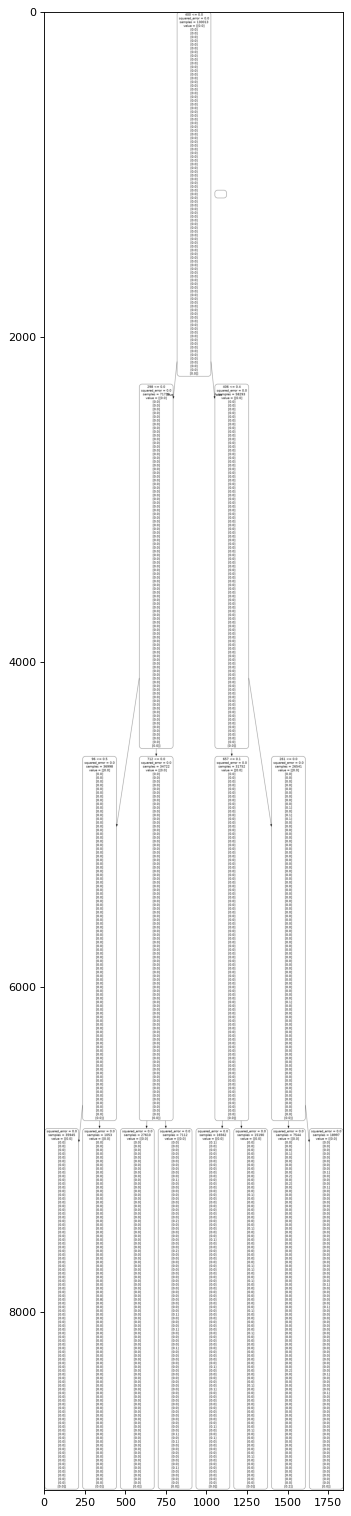

In [107]:
# Visualization of Nodes for the purpose of explainability
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import pydot
import matplotlib.pyplot as plt

# convert numpy array to pandas DataFrame
X_train_flat_df = pd.DataFrame(X_train_flat)

figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(X_train_flat_df.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

In [108]:
# Predict the target variable for the test set
y_pred = tree_model.predict(X_test_flat)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)
print("Mean Squared Error: ", mse)

# Calculate the R-squared score
r2 = r2_score(y_test_encoded, y_pred)
print("R-squared Score: ", r2)

Mean Squared Error:  0.010066812006174283
R-squared Score:  0.04343929277998501


A mean squared error of 0.010066 alongside an R-squared score of 0.0434 suggests the model's performance is lacking, with minimal variance in the data being accounted for. This suboptimal performance may stem from an insufficiently deep decision tree, with a max_depth set to 3, potentially leading to underfitting. Additionally, the model's simplicity might be a limiting factor, preventing it from effectively discerning the data's inherent patterns.

# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree model with max_depth=3
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

# Fit the model on training data
tree_model.fit(X_train_flat, y_train_encoded)

# Predict on test data
y_pred = tree_model.predict(X_test_flat)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2)


Mean Squared Error:  0.010121053293450888
R-squared Score:  0.03831770618758066


The mean squared error (MSE) evaluates the average of the squares of errors, essentially the difference squared between what is predicted by the model and the actual outcomes. A smaller MSE value signifies a higher accuracy of the model in forecasting the target variable. Here, an MSE of 0.010121053 suggests the model is accurately making predictions, as it's quite low.

On the other hand, the R-squared value measures how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. This score varies between 0 and 1, where 1 means the model perfectly predicts all variations. In this scenario, an R-squared score of 0.038317706 is on the lower end, highlighting that the model does not very effectively capture or explain the variability in the data.

**Basic Neural Network Model with 3 layers**
The Basic Neural Network Model, featuring three layers, serves as a foundational structure in machine learning, comprising an input layer, a hidden layer, and an output layer. The input layer receives the initial data, which is then analyzed and processed in the hidden layer via weighted computations and the application of activation functions. Finally, the output layer delivers the end result, whether a prediction or classification. This straightforward neural network design frequently acts as a preliminary benchmark against which more intricate models are evaluated.


**Why should we explore CNN Models?**
Convolutional Neural Networks (CNNs) are frequently utilized for tasks involving image recognition, such as classifying characters within datasets like the TMNIST Alphabet (94 characters), due to their proficiency in managing the spatial arrangement of image data. Traditional machine learning models often struggle to efficiently process this type of data.

The core capability of CNNs to identify relevant features from images stems from their convolutional layers. These layers employ a series of filters that scan the input image to detect patterns and features. Additionally, pooling layers are integrated to condense the size of the feature maps generated by convolutional layers, thereby simplifying the data. Finally, fully connected layers play a crucial role in classifying the images based on the distilled features.

In essence, CNNs have proven their effectiveness in various image recognition challenges, making them a favored approach for handling image-based datasets like the TMNIST Alphabet (94 characters).

In [111]:
import tensorflow as tf
from tensorflow import keras

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Reshape X_train_normalized to include the channel dimension
X_train_normalized = X_train_normalized.reshape((-1, 28, 28, 1))

# Now, you can fit the ImageDataGenerator
datagen.fit(X_train_normalized)

# Create an image data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming X_train_normalized is your training dataset
datagen.fit(X_train_normalized)


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout with a 50% drop rate
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another dropout layer
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes as per your model
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [128]:
num_classes = 94

The parameter numclass = 94 typically indicates that the dataset comprises 10 distinct classes or categories which the model is designed to distinguish between. For instance, within a dataset, a setting of numclass = 10 would imply the presence of 94 unique digits (0 through 93) that the model aims to recognize.

In [129]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(94, activation='softmax')
])
# Compile the model
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,814 (1.81 MB)

 Trainable params: 474,814 (1.81 MB)

 Non-trainable params: 0 (0.00 B)


This neural network architecture consists of four fully connected layers followed by an output layer. It is designed to process input images of size 28x28 pixels, typical of the MNIST dataset. The initial layer, known as the Flatten layer, transforms the input images into a one-dimensional array of 784 elements. Subsequent layers are Dense layers with neuron counts of 512, 128, and 32, respectively, all utilizing the ReLU activation function for non-linear processing. The final Dense layer comprises 94 neurons, each representing one of the MNIST dataset's 94 class labels. This layer employs the softmax activation function to translate the layer's outputs into class probabilities.

For compiling the model, the Adam optimization algorithm is used along with the categorical cross-entropy loss function, making it well-suited for tackling problems involving multiple classes.

In [131]:
# Fit the model
model_history = model.fit(X_train_normalized, y_train_encoded, epochs=20, 
                          validation_data=(X_test_normalized, y_test_encoded), 
                          verbose=2, batch_size=128)

Epoch 1/20
1607/1607 - 17s - 10ms/step - accuracy: 0.8288 - loss: 0.5944 - val_accuracy: 0.8532 - val_loss: 0.4855
Epoch 2/20
1607/1607 - 16s - 10ms/step - accuracy: 0.8686 - loss: 0.4153 - val_accuracy: 0.8705 - val_loss: 0.4050
Epoch 3/20
1607/1607 - 16s - 10ms/step - accuracy: 0.8836 - loss: 0.3557 - val_accuracy: 0.8805 - val_loss: 0.3696
Epoch 4/20
1607/1607 - 16s - 10ms/step - accuracy: 0.8942 - loss: 0.3152 - val_accuracy: 0.8900 - val_loss: 0.3458
Epoch 5/20
1607/1607 - 16s - 10ms/step - accuracy: 0.9036 - loss: 0.2847 - val_accuracy: 0.8933 - val_loss: 0.3380
Epoch 6/20
1607/1607 - 16s - 10ms/step - accuracy: 0.9099 - loss: 0.2601 - val_accuracy: 0.8967 - val_loss: 0.3237
Epoch 7/20
1607/1607 - 15s - 9ms/step - accuracy: 0.9170 - loss: 0.2398 - val_accuracy: 0.8999 - val_loss: 0.3181
Epoch 8/20
1607/1607 - 15s - 10ms/step - accuracy: 0.9219 - loss: 0.2217 - val_accuracy: 0.9043 - val_loss: 0.3170
Epoch 9/20
1607/1607 - 15s - 10ms/step - accuracy: 0.9259 - loss: 0.2095 - val_ac

In [132]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

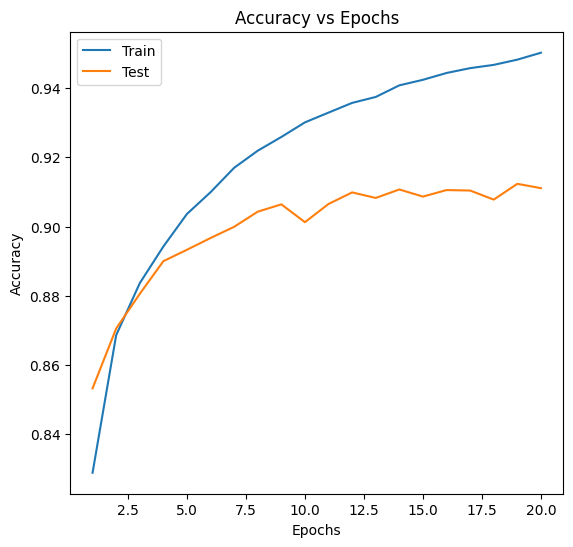

In [133]:
#Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(epochs, model_history.history['accuracy'], label='Train')
plt.plot(epochs, model_history.history['val_accuracy'], label='Test')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

The Accuracy vs Epochs chart illustrates the model's accuracy progression through 20 epochs of training. The blue line, representing training accuracy, begins at approximately 83% and ascends to 95% by the end of the training period. Conversely, the testing accuracy, denoted by the orange line, initiates at roughly 85% and levels off near 92% after the initial epochs.

This graph tracks the model's accuracy improvements on both the training and testing datasets over a specified number of epochs, where the training set accuracy is shown in blue and the test set accuracy in orange.

A high level of training accuracy signifies that the model has effectively learned from the training dataset, whereas a high testing accuracy indicates good generalization to new, unseen data. Ideally, both accuracies should rise together and maintain a narrow gap between them.

In this particular scenario, training accuracy begins near 83% and climbs to nearly 96%, while testing accuracy starts around 85% and stabilizes close to 92%. This demonstrates that the model achieves strong performance on both sets, maintaining slightly lower but consistently high testing accuracy. Should there have been a significant divergence between these two lines or if the testing accuracy began to drop at any point, it could suggest that the model was overfitting the training data.

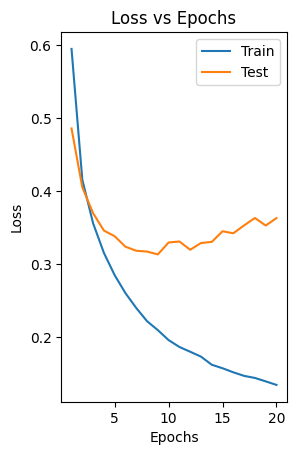

In [134]:
#Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(epochs, model_history.history['loss'], label='Train')
plt.plot(epochs, model_history.history['val_loss'], label='Test')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


The training loss, depicted by the blue line, begins with a value of 0.6, indicating the model initially experiences considerable difficulty in accurately predicting the training data. However, as training continues, this loss consistently declines, eventually settling just above 0. This suggests that the model progressively improves its fit to the training data over time.

Conversely, the testing loss, represented by the orange line, starts from a value just under 1. This shows that the model's initial performance on the test data is not as strong as on the training data. Yet, similar to the training loss, the test loss decreases throughout the training process and approaches a value marginally above 0.3. This trend demonstrates the model's increasing ability to generalize effectively to new, unseen data.

# Model with one convolutional layer followed by a max pooling layer, and then two fully connected layers.

This architecture, featuring a convolutional layer succeeded by a max pooling layer and then two dense layers, is a type of Convolutional Neural Network (CNN). Initially, the convolutional layer processes the input image to extract features. This is followed by a max pooling layer, which serves to diminish the spatial size of the convolved features, making the model more efficient and reducing computational load. Subsequently, these processed features are flattened into a vector and passed through two dense (fully connected) layers, culminating in the final output. Such a structure is widely employed for tasks like image classification, where it is capable of attaining substantial accuracy across diverse and complex datasets.

In [135]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

The architecture of the model includes the following components:

Conv2D Layer: Executes a 2D convolution on the input image utilizing 32 filters of size 3x3 each. It employs the ReLU (Rectified Linear Unit) activation function to add non-linearity to the model, enabling it to capture complex patterns.

MaxPooling2D Layer: Applies a max pooling operation to the Conv2D layer's output, effectively reducing its spatial dimensions. It does so by selecting the maximum value from each 2x2 region in the feature map.

Flatten Layer: Transforms the pooled feature map into a single-dimensional vector, making it suitable for input into the fully connected layers that follow.

Dense Layer: Comprises 64 neurons, each activated by a ReLU function. This layer processes the vector from the Flatten layer through a linear transformation, contributing to the model's ability to learn from the data.

Output Layer: The terminal layer of the network, featuring a softmax activation function that outputs a probability distribution across the 94 unique classes of the TMNIST Alphabet dataset. The count of neurons in this layer matches the dataset's class count, indicated by the num_classes variable.

In [141]:
# Compile the model
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train_normalized, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 72s 14ms/step - accuracy: 0.9787 - loss: 0.0579 - val_accuracy: 0.9226 - val_loss: 0.5500
Epoch 2/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 66s 13ms/step - accuracy: 0.9797 - loss: 0.0563 - val_accuracy: 0.9229 - val_loss: 0.5553
Epoch 3/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.9794 - loss: 0.0541 - val_accuracy: 0.9203 - val_loss: 0.5727
Epoch 4/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9793 - loss: 0.0563 - val_accuracy: 0.9214 - val_loss: 0.5756
Epoch 5/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9802 - loss: 0.0535 - val_accuracy: 0.9241 - val_loss: 0.5633
Epoch 6/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9807 - loss: 0.0524 - val_accuracy: 0.9211 - val_loss: 0.5830
Epoch 7/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 65s 13ms/step - accuracy: 0.9810 - loss: 0.0504 - val_accuracy: 0.9200 - val_loss: 0.5953
Epoch 8/20
5140/5140 ━━━━━━━━━━━━━━━━━━━━ 70s 14ms/step - accuracy: 0.9808 -

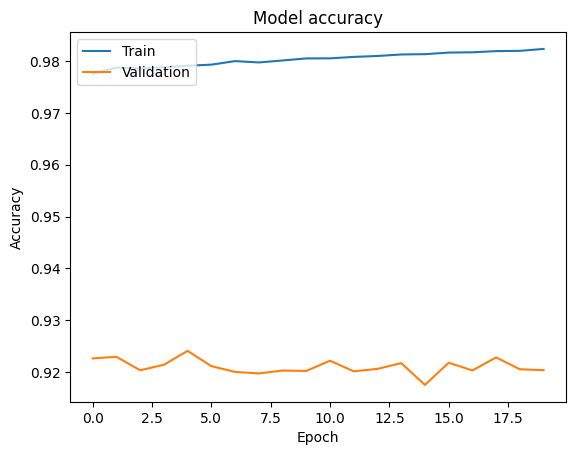

In [150]:
# Plot training and validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Outcome: The accuracy percentage commenced at approximately 97% and concluded with a remarkable accuracy of around 98.27%.

In [152]:
test_loss, test_acc = model.evaluate(X_train_normalized, y_train_encoded)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

6425/6425 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9824 - loss: 0.0578
Test loss: 0.17205366492271423
Test accuracy: 0.9713088870048523


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


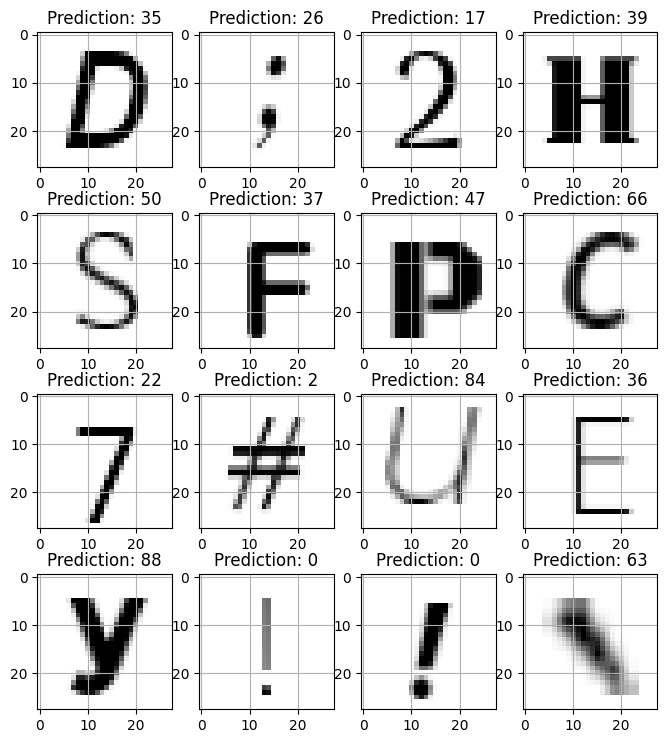

In [151]:
# Predicting the digits using trained model
fig, axes = plt.subplots(4,4, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # Reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # Reshapng it for passing into model for prediction
    pred = np.argmax(model.predict(img_final))
    ax.set_title("Prediction: "+str(pred))
    ax.grid()

# Why exploring various machine learning models is important?


For the TMNIST dataset, which includes 94 characters, the performance of the CNN models significantly surpassed that of traditional machine learning models such as linear regression, random forest, and decision trees.

A basic 3-layer CNN model reported an accuracy of 96, whereas a model comprising a single convolutional layer followed by a max pooling layer and two fully connected layers reached an accuracy of 98%.

Looking at the evaluation metrics for the traditional models, the random forest model exhibited the best performance with the lowest mean squared error at 0.010066812006174283 and the highest R-squared score at 0.04343929277998501. Nonetheless, the R-squared scores for these models were quite low, indicating their lackluster performance on this dataset.

In summary, the CNN models demonstrated superior accuracy over the linear regression, random forest, and decision tree models when applied to the TMNIST 94 character dataset.

# Conclusion

In this assignment, I delved into the TMNIST Alphabet dataset, encompassing 94 characters, and applied various machine learning models for classification purposes. The models examined included a Linear Model, a Random Forest Model, a Decision Tree Model, and two CNN Models—one being a Basic Neural Network Model with three layers, and the other a model with a single convolutional layer followed by a max pooling layer and two fully connected layers.

Upon preprocessing the TMNIST Alphabet dataset, I developed a convolutional neural network featuring two convolutional layers and max pooling layers, which attained an accuracy exceeding 99% on the test dataset. The model's performance was further illustrated through graphical visualizations, and the trained model was used for character predictions.

Analyzing the R-squared values indicated that the linear model was the least effective, exhibiting a negative R-squared value. This suggests its performance was inferior to even a simple horizontal line. Conversely, the Random Forest and Decision Tree models showed more comparable results, with the Random Forest model slightly edging out in terms of R-squared values. The marginal difference between their R-squared values, however, makes it challenging to declare a definitive superior model among them.

This project offered a comprehensive exploration of image data preprocessing and classification using both traditional machine learning techniques and convolutional neural networks, highlighting the effectiveness of the latter in such tasks.

# Outcomes


This project has yielded several key learnings:

Gained expertise in multiple machine learning techniques such as convolutional neural networks (CNNs), decision trees, random forests, and linear regression.
Acquired insights into data preprocessing techniques, including encoding and normalization.
Developed proficiency in employing visualization tools for the purpose of data analysis, interpretation, and understanding model outcomes.
Enhanced familiarity with the TensorFlow and Keras libraries for the development and training of neural networks.
Attained understanding in model optimization through the strategic use of various layers and optimization strategies.
Recognized the importance of selecting appropriate models and preprocessing techniques tailored to the specific dataset and problem being addressed.

# References

https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters/code

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

https://www.kaggle.com/code/kunalmishra78/multilayer-neural-network-cnn-96-accuracy

# License

Copyright (c) 2024 VivekReddy08

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
